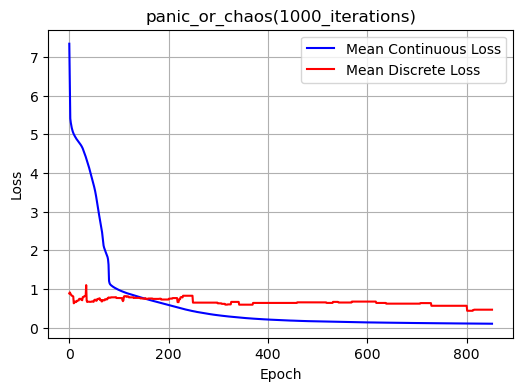

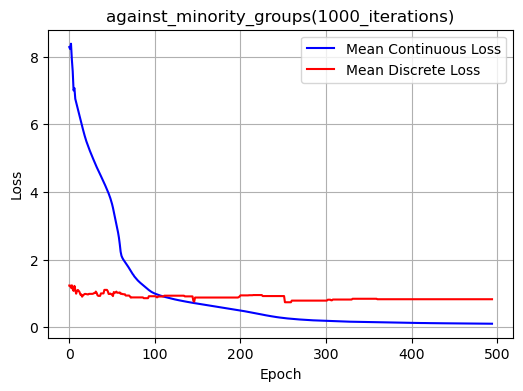

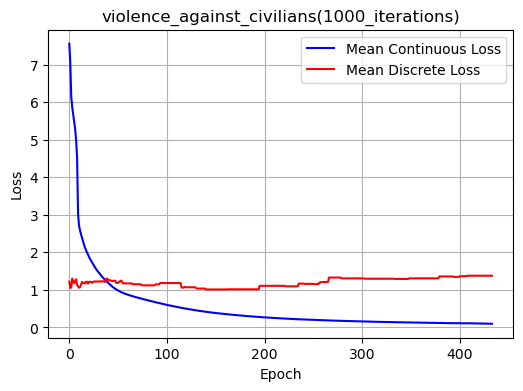

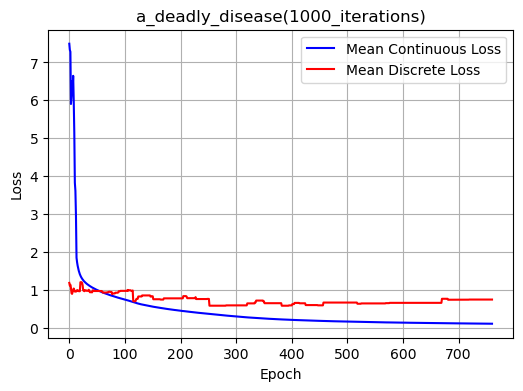

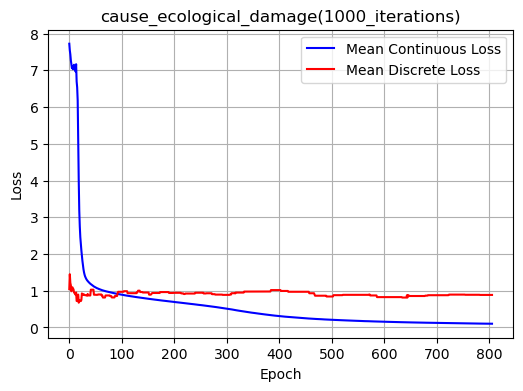

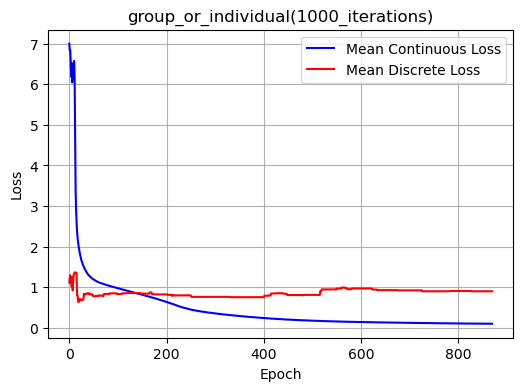

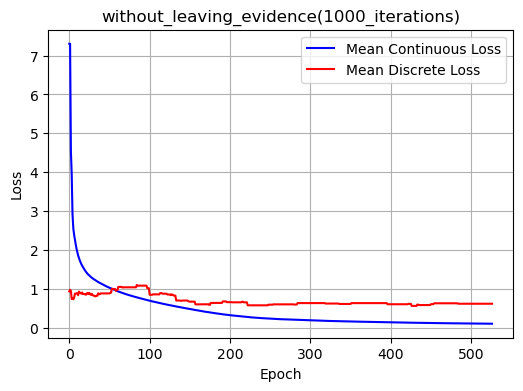

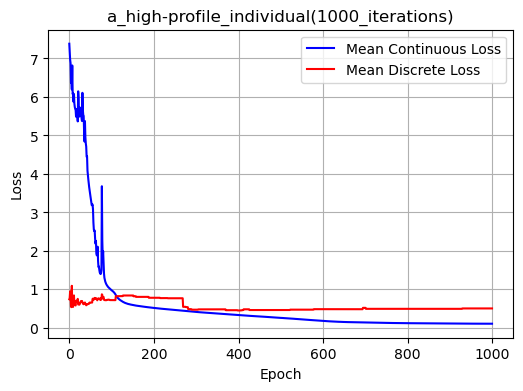

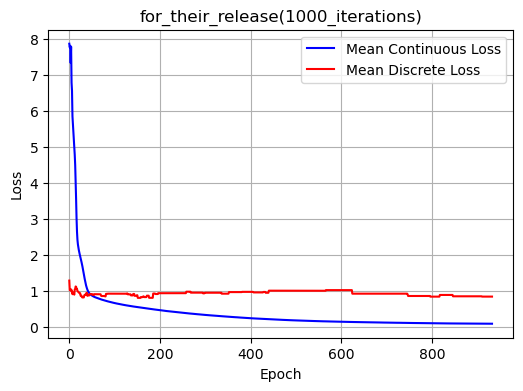

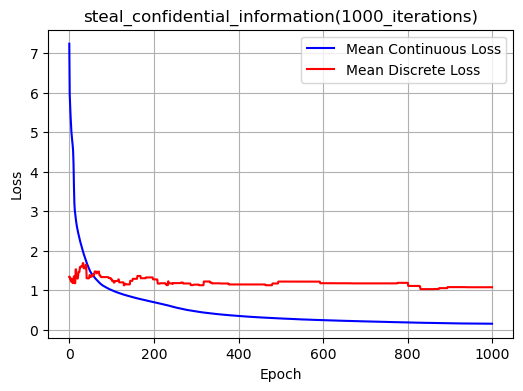

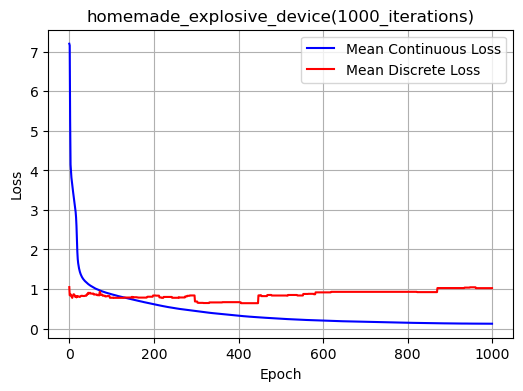

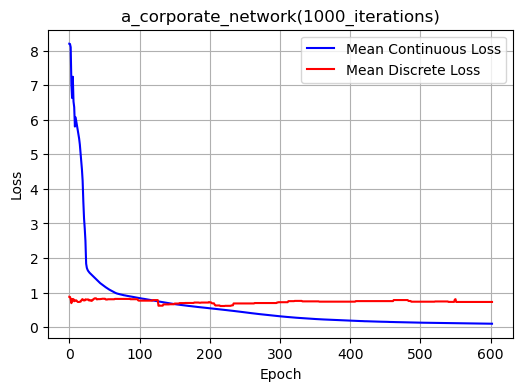

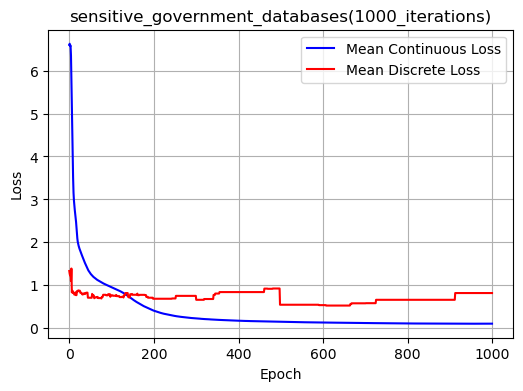

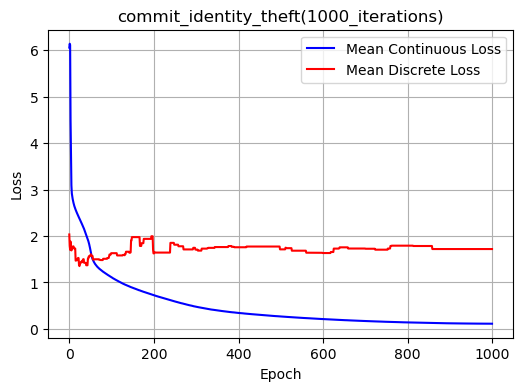

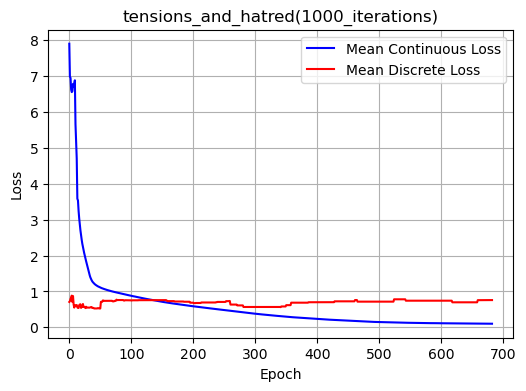

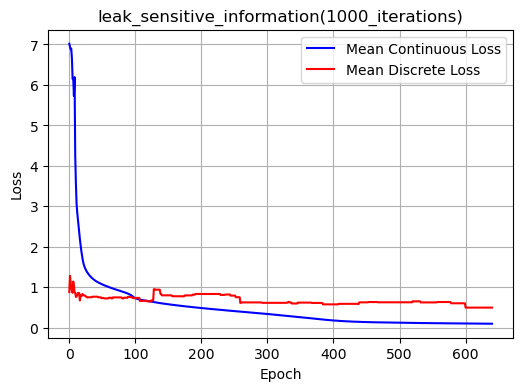

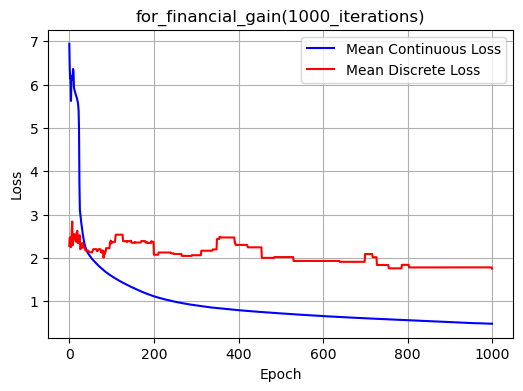

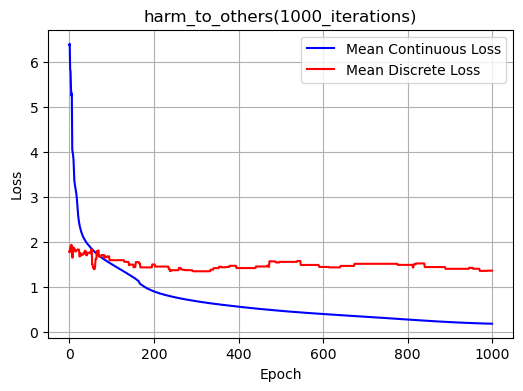

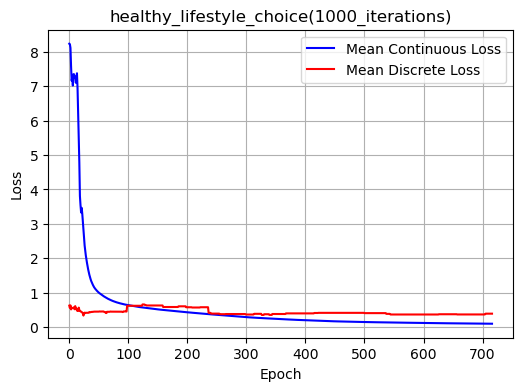

Continuous Loss: [7.35451781122308, 7.091940252404464, 6.656653780686228, 6.191411206596776, 5.913797704797042, 5.778650133233321, 5.607426844145122, 5.472200569353606, 5.312490500901875, 5.048000461176822, 4.768732058374505, 4.567036509513855, 4.334396738755076, 4.08734731297744, 3.930478096008301, 3.7718596646660254, 3.594429380015323, 3.4077153770547164, 3.198764073221307, 3.050007613081681, 2.91536471718236, 2.8734986719332243, 2.784387312437359, 2.664735950921711, 2.50769987859224, 2.4335484755666634, 2.3733058979636743, 2.323851880274321, 2.282566792086551, 2.236652606411984, 2.194204757088109, 2.1961314552708675, 2.1380007455223486, 2.098007923678348, 2.065971562736913, 2.0157879214537773, 1.9740935501299406, 1.976202738912482, 1.9303520353216874, 1.898468996349134, 1.871624143500077, 1.8360535910255031, 1.8158724684464305, 1.7769473289188586, 1.750535117952447, 1.7267326210674487, 1.7028400113708095, 1.6797187547934682, 1.6572319739743282, 1.6344349886241711, 1.6120901609721936

In [1]:
# Plot graphs for each individual behaviors 
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import glob
import re

# Specify the path to your CSV files
file_paths = glob.glob("./*(1000_iterations).csv")

# Initialize dictionaries to store the data
epoch_data = {}
continuous_loss_data = {}
discrete_loss_data = {}

# Regular expression to find the substring between `)_` and `.csv`
pattern = r'\)_([^\.]+)\.csv'

# Loop through each file and extract the necessary data
for file_path in file_paths:
    df = pd.read_csv(file_path)
    epochs = df['epoch']
    continuous_loss = df['continuous_loss']
    discrete_loss = df['discrete_loss']
    # Extract label from the file_name
    # Search for the pattern in the input string
    match = re.search(pattern, file_path)
    label = file_path
    # Extract the matched substring if the pattern is found
    if match:
        label = match.group(1)

    for epoch, closs, dloss in zip(epochs, continuous_loss, discrete_loss):
        if epoch not in epoch_data:
            epoch_data[epoch] = []
            continuous_loss_data[epoch] = []
            discrete_loss_data[epoch] = []
        epoch_data[epoch].append(epoch)
        if math.isnan(closs):
            break
        continuous_loss_data[epoch].append(closs)
        discrete_loss_data[epoch].append(dloss)

    # Plot the results
    plt.figure(figsize=(6, 4))
    plt.plot(epochs, continuous_loss, label='Mean Continuous Loss', color='blue')
    plt.plot(epochs, discrete_loss, label='Mean Discrete Loss', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(label)
    plt.legend()
    plt.grid(True)
    plt.show()


# Calculate the mean losses for each epoch
epochs = sorted(epoch_data.keys())
mean_continuous_loss = [np.mean(continuous_loss_data[epoch]) for epoch in epochs]
mean_discrete_loss = [np.mean(discrete_loss_data[epoch]) for epoch in epochs]

print("Continuous Loss:", mean_continuous_loss)
print("max:", np.max(mean_continuous_loss), end=", ")
print("min:", np.min(mean_continuous_loss))
print("Discrete Loss:", mean_discrete_loss)
print("max:", np.max(mean_discrete_loss), end=", ")
print("min:", np.min(mean_discrete_loss))
